In [1]:
# Read data
import pandas as pd
import numpy as np

crime_data = pd.read_csv('./Pre-covid.csv')

In [2]:
crime_data['Month'] = pd.to_datetime(crime_data['Date']).dt.month
#df.sort_values(by=['Year'])


crime_data.drop('ID', axis=1, inplace=True)
crime_data.drop('Case Number', axis=1, inplace=True)
crime_data.drop('IUCR', axis=1, inplace=True)
crime_data.drop('Beat', axis=1, inplace=True)
crime_data.drop('Updated On', axis=1, inplace=True)
crime_data.drop('Latitude', axis=1, inplace=True)
crime_data.drop('Longitude', axis=1, inplace=True)
crime_data.drop('Location', axis=1, inplace=True)
crime_data.drop('FBI Code', axis=1, inplace=True)
crime_data.drop('Block', axis=1, inplace=True)
crime_data.drop('X Coordinate', axis=1, inplace=True)
crime_data.drop('Y Coordinate', axis=1, inplace=True)
crime_data.drop('Date', axis=1, inplace=True)


crime_data.sort_values(by='Year',ascending=True)

display(crime_data.head())

for col in crime_data.columns:
    crime_data[col] = col + '-' + crime_data[col].astype(str)
    
display(crime_data.head())

,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Month
0,THEFT,OVER $500,RESIDENCE,False,True,6.0,8.0,44.0,2018,9
1,THEFT,$500 AND UNDER,STREET,False,False,16.0,45.0,15.0,2020,3
2,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,COMMERCIAL / BUSINESS OFFICE,False,False,1.0,3.0,33.0,2019,9
3,THEFT,RETAIL THEFT,GROCERY FOOD STORE,False,False,12.0,26.0,24.0,2019,10
4,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,17.0,33.0,14.0,2018,12


,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Month
0,Primary Type-THEFT,Description-OVER $500,Location Description-RESIDENCE,Arrest-False,Domestic-True,District-6.0,Ward-8.0,Community Area-44.0,Year-2018,Month-9
1,Primary Type-THEFT,Description-$500 AND UNDER,Location Description-STREET,Arrest-False,Domestic-False,District-16.0,Ward-45.0,Community Area-15.0,Year-2020,Month-3
2,Primary Type-DECEPTIVE PRACTICE,Description-FINANCIAL IDENTITY THEFT $300 AND ...,Location Description-COMMERCIAL / BUSINESS OFFICE,Arrest-False,Domestic-False,District-1.0,Ward-3.0,Community Area-33.0,Year-2019,Month-9
3,Primary Type-THEFT,Description-RETAIL THEFT,Location Description-GROCERY FOOD STORE,Arrest-False,Domestic-False,District-12.0,Ward-26.0,Community Area-24.0,Year-2019,Month-10
4,Primary Type-OTHER OFFENSE,Description-TELEPHONE THREAT,Location Description-RESIDENCE,Arrest-False,Domestic-False,District-17.0,Ward-33.0,Community Area-14.0,Year-2018,Month-12


In [3]:
# Converting to tuples as Apriori takes transaction data as input (list of lists)

crime_data_tuples = [tuple(row) for row in crime_data.values.tolist()]
print("Total number of records =", len(crime_data_tuples))

Total number of records = 528391


In [4]:
min_support = 0.05
min_confidence = 0.5
min_lift = 1

In [5]:
# Running Aprior

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from datetime import datetime


te = TransactionEncoder()
te_ary = te.fit(crime_data_tuples).transform(crime_data_tuples)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

start=datetime.now()
frq_items = apriori(df, min_support = min_support, use_colnames = True)
print("Time taken to run Apriori:", datetime.now() - start)

Time taken to run Apriori: 0:01:07.723243


In [6]:
# Formatting, formatting and writing the frequent itemset to csv

rules = association_rules(frq_items, metric ="lift", min_threshold = min_lift)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
rules['antecedents_length'] = rules['antecedents'].apply(lambda x: len(x))

rules['consequent support'] = rules['consequent support'].round(decimals = 2)
rules['antecedent support'] = rules['antecedent support'].round(decimals = 2)
rules['support'] = rules['support'].round(decimals = 2)
rules['confidence'] = rules['confidence'].round(decimals = 2)
rules['lift'] = rules['lift'].round(decimals = 2)

filtered_rules = rules[(rules['confidence']  >= min_confidence)&((rules['antecedents_length']  == 1)) ]

print("Number of rules generated:", len(filtered_rules))  

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(filtered_rules.head())
    
filtered_rules.to_csv('Pre-Apriori.csv', columns = ['antecedents','consequents','support','confidence','lift'], sep=',', encoding='utf-8', index=False)

Number of rules generated: 81


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length
57,(Description-DOMESTIC BATTERY SIMPLE),(Primary Type-BATTERY),0.09,0.19,0.09,1.0,5.31,0.073490,inf,1
52,(Description-$500 AND UNDER),(Primary Type-THEFT),0.09,0.24,0.09,1.0,4.15,0.068916,inf,1
61,(Description-OVER $500),(Primary Type-THEFT),0.06,0.24,0.06,1.0,4.15,0.042993,inf,1
47,(Primary Type-NARCOTICS),(Arrest-True),0.05,0.21,0.05,1.0,4.79,0.043282,3268.103444,1
95,(Primary Type-NARCOTICS),(Domestic-False),0.05,0.83,0.05,1.0,1.20,0.009015,298.699811,1


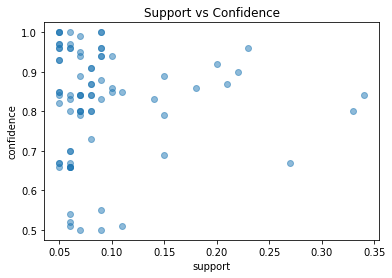

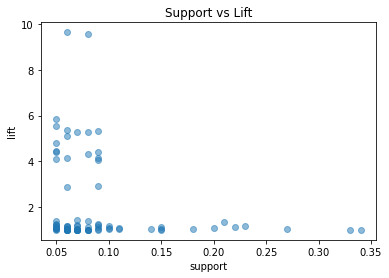

In [7]:
import matplotlib.pyplot as plt
plt.scatter(filtered_rules['support'], filtered_rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

plt.scatter(filtered_rules['support'], filtered_rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

# Efficient apriori

from efficient_apriori import apriori

start=datetime.now()
itemsets, rules = apriori(crime_data_tuples, min_support=min_support, min_confidence=min_confidence)
print("Time taken to run Efficient Apriori:", datetime.now() - start)
print("Number of rules generated:", len(rules))  
display(rules)  